In [151]:
import glob
import pandas as pd
import tesserocr
from PIL import Image, ImageOps
from random import randint
from tqdm import tqdm


In [176]:
def grayscale(image):
    """Converts the image to grayscale."""
    return image.convert('L')


def threshold(image, threshold=127):
    """Applies a thresholding filter to the image."""
    return image.point(lambda x: 0 if x < threshold else 255)


def crop_image(image, crop_percentage_height=0.3, crop_percentage_width=0.1):
    width, height = image.size
    crop_height = int(height * crop_percentage_height)
    crop_width = int(width * crop_percentage_width)
    # Crop the image to the lower part
    return image.crop((crop_width, height - crop_height, width - crop_width, height))


def preprocess_image(image):
    image = crop_image(image)

    image = threshold(image, 220)

    image = grayscale(image)

    image = ImageOps.invert(image)

    return image



In [261]:
def detect_hebrew_subtitles(image, api):
    api.SetVariable("tessedit_char_whitelist", 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzאבגדהוזחטיכלמנסעפצקרשתץףךןם !-?.0123456789*"')
    api.SetImage(image)

    text = api.GetUTF8Text()

    return text.strip(), api.AllWordConfidences()

In [262]:
directory = 'D:\\memes\\'
files = glob.glob(directory + '**/*.jpg', recursive=True) + glob.glob(directory + '**/*.png', recursive=True) + glob.glob(directory + '**/*.jpeg', recursive=True)
api = tesserocr.PyTessBaseAPI(path=r".\tessdata-main", lang="heb_kan11", psm=tesserocr.PSM.SINGLE_BLOCK)

In [297]:
data = []

for f in tqdm(files):
    image = Image.open(f)
    aspect_ratio = image.size[0] / image.size[1]
    image = preprocess_image(image)
    text, confidence = detect_hebrew_subtitles(image, api)
    d = f.replace('D:\\', '').replace('\\', '/')
    data.append({
        'image_url': d,
        'text': text,
    #    'confidence': confidence,
        'series': d.replace('memes/', '').split('/')[:-1],
        'aspect_ratio': aspect_ratio
    })

100%|██████████| 2649/2649 [03:34<00:00, 12.34it/s]


In [296]:
data

[{'image_url': 'memes/היהודים באים/עונה 1/192136084_3055858217967017_8736736783321267222_n.jpg',
  'text': 'חסרים לנו אנשים כמוך.',
  'series': ['היהודים באים', 'עונה 1'],
  'aspect_ratio': 1.7666666666666666},
 {'image_url': 'memes/היהודים באים/עונה 1/192785723_3055857084633797_1516435809277082119_n.jpg',
  'text': 'סליחה עכשיו אתה\nאומר שאני מטומטמת?',
  'series': ['היהודים באים', 'עונה 1'],
  'aspect_ratio': 1.7666666666666666},
 {'image_url': 'memes/היהודים באים/עונה 1/192819392_3055855947967244_4575800588498618626_n.jpg',
  'text': 'כי אני שונא את החייםישלי..2 ש',
  'series': ['היהודים באים', 'עונה 1'],
  'aspect_ratio': 1.7666666666666666},
 {'image_url': 'memes/היהודים באים/עונה 1/193150300_3055858497966989_9090087433698546383_n.jpg',
  'text': 'כאלה חמודים כשהם ישנים.',
  'series': ['היהודים באים', 'עונה 1'],
  'aspect_ratio': 1.7666666666666666},
 {'image_url': 'memes/היהודים באים/עונה 1/193207570_3055857464633759_4650455971432032118_n.jpg',
  'text': 'די. תקומי את.',
  'serie

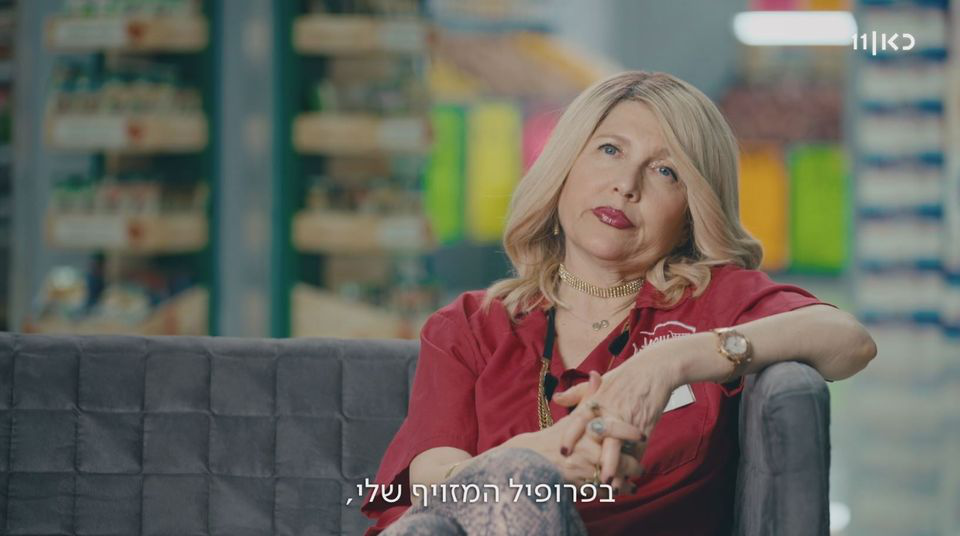

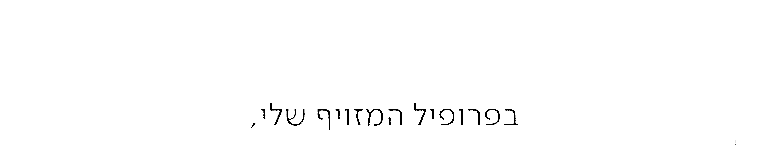

בפרופיל המזויף שלי


KeyError: 'confidence'

In [298]:
def display_image_and_text(idx):
    image = Image.open('D:/'+data[idx]["image_url"])
    pro_image = preprocess_image(image)
    display(image, pro_image)

    print(data[idx]["text"])
    print(data[idx]["confidence"])
   # print(pd.DataFrame({"Word": data[idx]['text'].split(), "Confidence Score": data[idx]["confidence"]}).to_string(index=False))

idx = randint(0, len(data))
display_image_and_text(idx)

In [288]:
data[1]

{'image_url': 'memes/היהודים באים/עונה 1/192785723_3055857084633797_1516435809277082119_n.jpg',
 'text': 'סליחה עכשיו אתה\nאומר שאני מטומטמת?',
 'series': ['היהודים באים', 'עונה 1']}

In [299]:
df = pd.DataFrame(data)
df.to_json('memes.json', orient='records')